In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\food_orders_new_delhi.csv")
data_copy=data.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
data.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [5]:
data.shape

(1000, 12)

In [6]:
data.isna().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [7]:
data.nunique()

Order ID                  1000
Customer ID                947
Restaurant ID              621
Order Date and Time       1000
Delivery Date and Time    1000
Order Value                769
Delivery Fee                 5
Payment Method               3
Discounts and Offers         5
Commission Fee             151
Payment Processing Fee      41
Refunds/Chargebacks          4
dtype: int64

In [8]:
data=data.drop_duplicates()

In [9]:
data=data.drop(['Order ID'], axis=1)

In [10]:
data["Delivery Fee"].value_counts()

30    208
40    207
50    204
20    195
0     186
Name: Delivery Fee, dtype: int64

In [11]:
data.describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1053.969000,28.620000,126.99000,29.832000,28.300000
std,530.975339,16.958278,43.06405,11.627165,49.614228
min,104.000000,0.000000,50.00000,10.000000,0.000000
25%,597.750000,20.000000,90.00000,20.000000,0.000000
50%,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1995.000000,50.000000,200.00000,50.000000,150.000000


In [12]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

In [13]:
def extract_discount(discount_str):
    if 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        
        return float(discount_str.split('%')[0])
    else:
        
        return 0.0
    
data['Discount Percentage'] = data['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
data['Discount Amount'] = data.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

#adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
data['Discount Amount'] = data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)



In [14]:
print(data[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(30), data.dtypes)

    Order Value Discounts and Offers  Discount Percentage  Discount Amount
0          1914            5% on App                  5.0            95.70
1           986                  10%                 10.0            98.60
2           937         15% New User                 15.0           140.55
3          1463                 None                  0.0             0.00
4          1992         50 off Promo                 50.0           996.00
5           439                  10%                 10.0            43.90
6           303            5% on App                  5.0            15.15
7           260                  10%                 10.0            26.00
8          1663            5% on App                  5.0            83.15
9           491                  10%                 10.0            49.10
10          868            5% on App                  5.0            43.40
11         1800         15% New User                 15.0           270.00
12          674          

In [21]:
# calculate total costs and revenue per order
data['Total Costs'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Discount Amount']+data['Refunds/Chargebacks']
data['Revenue'] = data['Commission Fee']
data['Profit'] = data['Revenue'] - data['Total Costs']

# aggregate data to get overall metrics
total_orders = data.shape[0]
total_revenue = data['Revenue'].sum()
total_costs = data['Total Costs'].sum()
total_profit = data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}
print(overall_metrics)


{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 261009.84999999998, 'Total Profit': -134019.85}


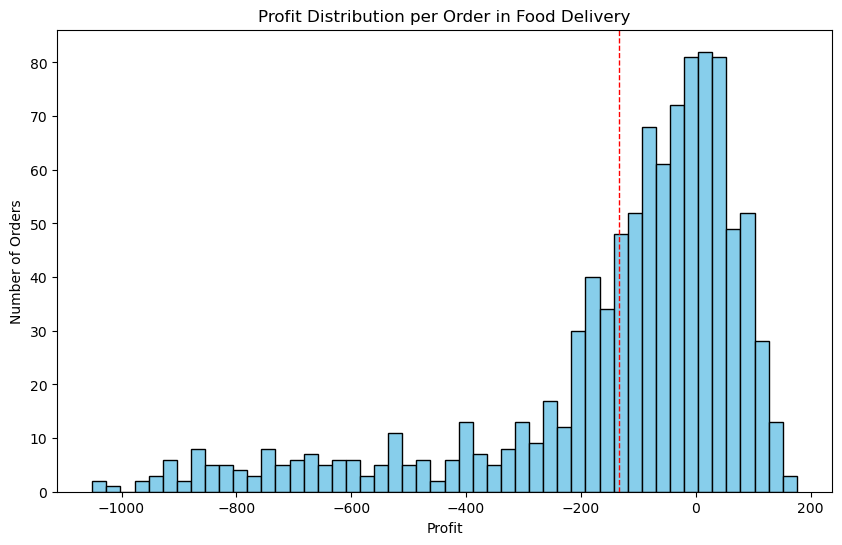

In [22]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(data['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

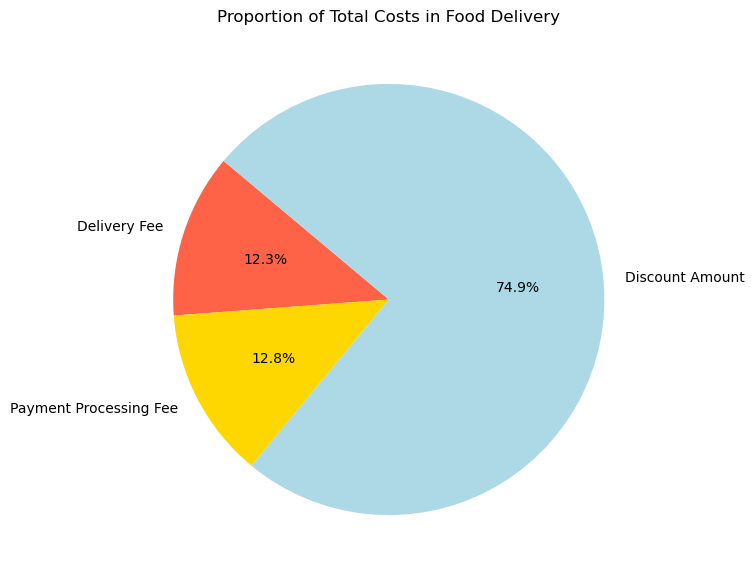

In [23]:
# pie chart for the proportion of total costs
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

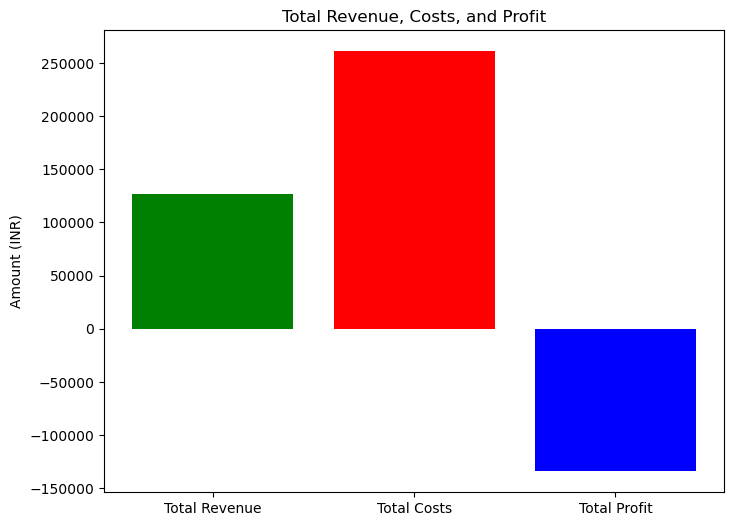

In [24]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [25]:
# filter the dataset for profitable orders
profitable_orders = data[data['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

31.59734746146824 5.7975460122699385


C:\Users\welcome\AppData\Local\Temp\ipykernel_4500\1457969475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\welcome\AppData\Local\Temp\ipykernel_4500\1457969475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


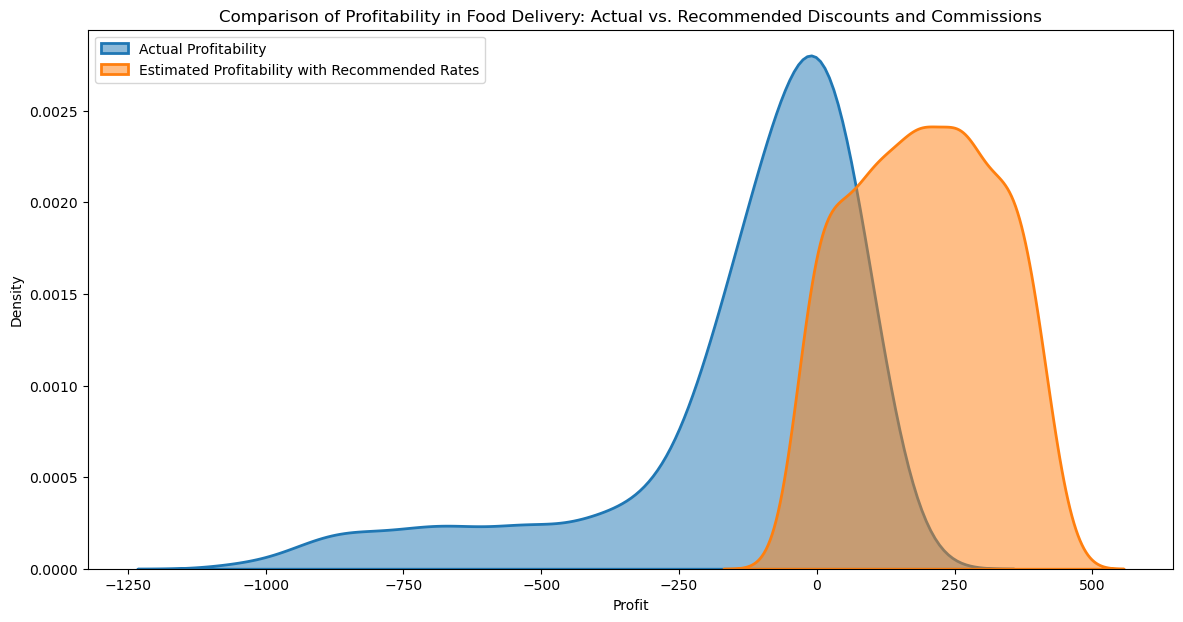

In [26]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
data['Simulated Commission Fee'] = data['Order Value'] * (recommended_commission_percentage / 100)
data['Simulated Discount Amount'] = data['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
data['Simulated Total Costs'] = (data['Delivery Fee'] +
                                        data['Payment Processing Fee'] +
                                        data['Simulated Discount Amount'])

data['Simulated Profit'] = (data['Simulated Commission Fee'] -
                                   data['Simulated Total Costs'])

# visualizing the comparison


plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(data['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(data['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()